# Mall Customer segmentation
In the mall customer segmentation problem I have cluster the people based on their spending scores and annual income.I have downloaded the dataset from Kaggle for the this problem.

dataset link: https://www.kaggle.com/datasets/shwetabh123/mall-customers

To cluster the peoples based on the spending scores and annual income I have used different clustering algorithms like **K-means clustering & Hierachical clustering** etc.

## (i) K-Means Clustering

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.datasets as data
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("Downloads/Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
x=dataset.iloc[:,[3,4]]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [10]:
x_in_array_format=x.values
x_in_array_format

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [5]:
from sklearn.cluster import KMeans

**WCSS:** WCSS stand for within cluster sum of squares, i.e we are finding the sum of distance of all data points to the centroid within the each clusters, so its known as WCSS. Below we are finding the wcss for 10 clusters.

In [6]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(x_in_array_format)
    print(kmeans.inertia_)
    wcss.append(kmeans.inertia_)

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


269981.28
181363.595959596
106348.37306211119
73679.78903948837
44448.45544793371
37265.86520484347
30259.65720728547
25095.703209997548
21830.041978049434
20736.679938924124


In [7]:
print(wcss)

[269981.28, 181363.595959596, 106348.37306211119, 73679.78903948837, 44448.45544793371, 37265.86520484347, 30259.65720728547, 25095.703209997548, 21830.041978049434, 20736.679938924124]


**Elbow Method:** Elbow method is used to determine the optimal number of clusters.In elbow method, we plot the number of clusters against the wcss on y axis. It is called elbow method beacuase, the graph looks like an elbow shape, You can see below.

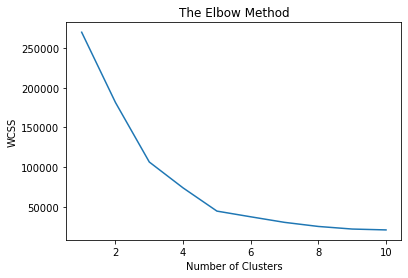

In [8]:
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In above elbow graph, we can see a considerable decline after cluster 5. So this means that the optimal number of clusters is 5

**Applying K-means using 5 clusters**

In [9]:
kmeans1=KMeans(n_clusters=5,random_state=0)
kmeans1.fit(x)

KMeans(n_clusters=5, random_state=0)

In [11]:
y_kmeans=kmeans1.predict(x_in_array_format)
y_kmeans

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [17]:
pd.set_option("display.max_rows",None)

In [18]:
dataset_with_clusters=pd.concat([dataset,pd.DataFrame(y_kmeans,columns=["Cluster"])],axis=1)
dataset_with_clusters

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
5,6,Female,22,17,76,3
6,7,Female,35,18,6,4
7,8,Female,23,18,94,3
8,9,Male,64,19,3,4
9,10,Female,30,19,72,3


In [13]:
kmeans1.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

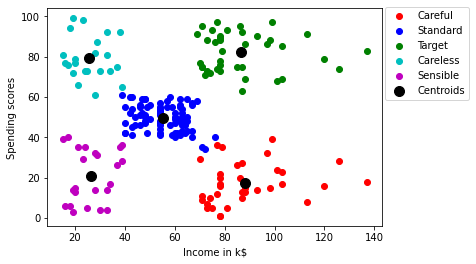

In [14]:
plt.scatter(x_in_array_format[y_kmeans==0,0],x_in_array_format[y_kmeans==0,1],c="r",label="Careful")
plt.scatter(x_in_array_format[y_kmeans==1,0],x_in_array_format[y_kmeans==1,1],c="b",label="Standard")
plt.scatter(x_in_array_format[y_kmeans==2,0],x_in_array_format[y_kmeans==2,1],c="g",label="Target")
plt.scatter(x_in_array_format[y_kmeans==3,0],x_in_array_format[y_kmeans==3,1],c="c",label="Careless")
plt.scatter(x_in_array_format[y_kmeans==4,0],x_in_array_format[y_kmeans==4,1],c="m",label="Sensible")
plt.scatter(kmeans1.cluster_centers_[:,0],kmeans1.cluster_centers_[:,1],c="k",label="Centroids",s=100)
plt.legend(loc=(1.01,0.58))
plt.xlabel("Income in k$")
plt.ylabel("Spending scores")
plt.show()

I have categorize the customers like **Careful, Standard, Target, Careless,Sensible** etc. You can see in above graph.

**Sample prediction**

In [15]:
customer_inform=np.array([47,70])
kmeans1.predict([customer_inform])

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1])

In [19]:
customer_inform1=np.array([137.5,26])
kmeans1.predict([customer_inform1])

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0])

## (ii) Hierarchical Clustering

In [4]:
import scipy.cluster.hierarchy as sch

**Dendrogram**: In hierarchical clustering, Dendrograms are used to examine the hierarchical clusters before deciding the apropriate number of clusters. In dendrogram, the dendrogram distance is the distance between two clusters when they combine.

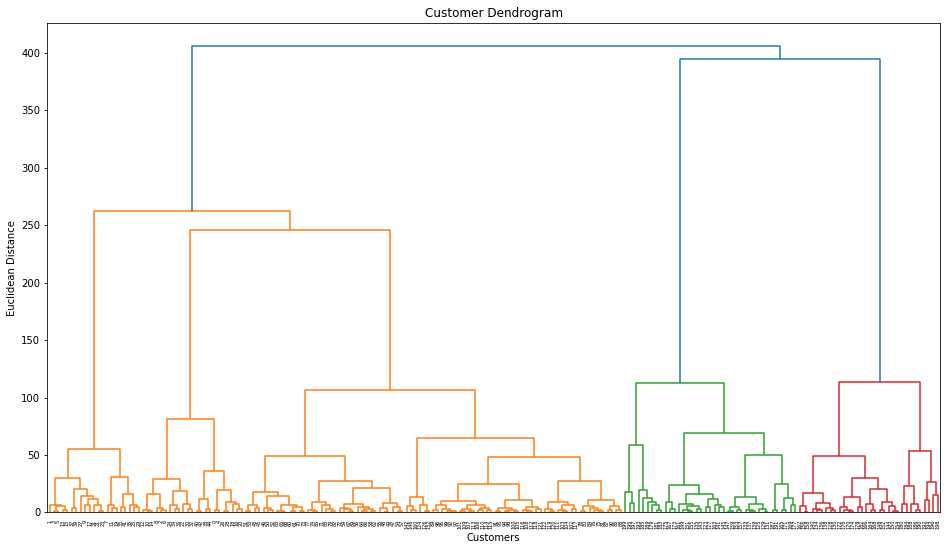

In [5]:
plt.figure(figsize=(16,9))
plt.title("Customer Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
dend=sch.dendrogram(sch.linkage(x,method="ward"))

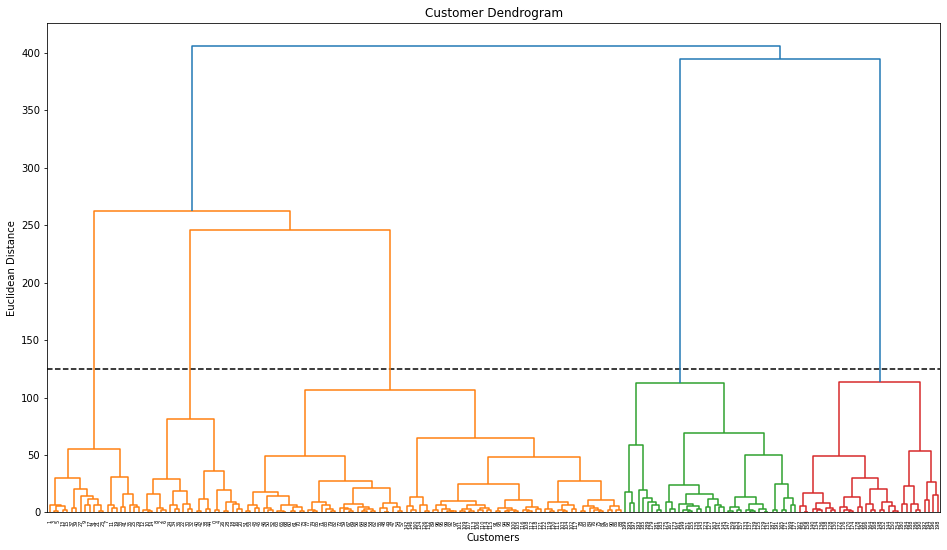

In [6]:
plt.figure(figsize=(16,9))
plt.title("Customer Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.axhline(y=125,color="k",linestyle="--")
dend=sch.dendrogram(sch.linkage(x,method="ward"))

To calcualte optimal clusters, first we have to find longest vertical line without crossing any horizontal lines,which is very right sided **blue line**, Now we try to set the threshold value in such way that it cuts the all vertical lines that comes before tallest line (very right sided blue line). Here threshold value is 125 and horizontal black line is the thrshold line which cuts the 5 vartical lines and therfore number of optimal clusters are 5.

In [7]:
from sklearn.cluster import AgglomerativeClustering as AC

In [12]:
clustering=AC(n_clusters=5)
y_hc=clustering.fit_predict(x_in_array_format)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [10]:
clustering.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

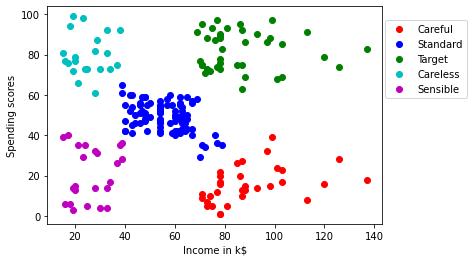

In [13]:
plt.scatter(x_in_array_format[y_hc==0,0],x_in_array_format[y_hc==0,1],c="r",label="Careful")
plt.scatter(x_in_array_format[y_hc==1,0],x_in_array_format[y_hc==1,1],c="b",label="Standard")
plt.scatter(x_in_array_format[y_hc==2,0],x_in_array_format[y_hc==2,1],c="g",label="Target")
plt.scatter(x_in_array_format[y_hc==3,0],x_in_array_format[y_hc==3,1],c="c",label="Careless")
plt.scatter(x_in_array_format[y_hc==4,0],x_in_array_format[y_hc==4,1],c="m",label="Sensible")
plt.legend(loc=(1.01,0.58))
plt.xlabel("Income in k$")
plt.ylabel("Spending scores")
plt.show()

# Conclusion

**1)** K-means and hirarchical clustering both have given same optimal number of clusters.

**2)** Mall customers segment (by above graph):

|Clusters     |Annual salary vs Spending score       |Customer segment|
|:-----------:|:------------------------------------:|:--------------:|
|Cluster(<span style="color:red;"> red </span>) |High income vs low spending score| Careful|
|Cluster(<span style="color:blue;"> blue </span>)|Normal income vs Normal spending score|Standard|
|Cluster(<span style="color:green;"> green </span>)|High income vs High spending score|Target|
|Cluster(<span style="color:cyan;"> cyan </span>)|Low income vs High spending score|Careless|
|Cluster(<span style="color:magenta;"> magenta </span>)|Low income vs Low spending score|Sensible|